#This notebook is to set up how you run GPU local runtime for Google Colab notebooks.  If you are using Colab GPU/TPU you do not need to do this.

#Setting up your environment

 This will guide you through a basic setup for an Ubuntu Linux deploy into Docker -> Colab.

#SECURITY:
- Do not run any notebooks for things that you do not trust.
- Through local connection setup; the notebook will be able to execute (read, write, delete) files on your local computer.
#- eg; commands such as "rm -rf/"
#!WILL RUN ON YOUR LOCAL COMPUTER!.

There are two options - the option for this is to run with GPU pulling from your local GPU.  If you are wanting to run from Colab's GPU, or you don't have the compute power, ignore these steps and select TPU from Colab.  



#Installation for GPU support on your desktop.

##NVIDIA CUDA Installation Guide for Linux:

https://docs.nvidia.com/cuda/cuda-installation-guide-linux/

- ensure you have:
  - CUDA-Capable GPU
  - Supported version of Linux with a gcc compiler and toolchain
  - CUDA Toolkit installed (next step)

  The following are commands to enter.  These commands you run from terminal *not from inside colab*.  

  


1. Verify you have CUDA Capable GPU

  If you have one GPU:

   `lspci | grep -i nvidia`
  If you have multiple GPU:

  `lspci | grep ' VGA ' | cut -d" " -f 1 | xargs -i lspci -v -s {}`

  Grab the output; the ID shown isn't the name of the graphics card.  Look up the number you have in this table for the name of your GPU: *(assuming you do not know it).*
  https://download.nvidia.com/XFree86/Linux-x86_64/535.98/README/supportedchips.html
  *(Tip - it will be on the right, and then refer to the item on the left).*
  
  Then look up the name in the following table to see if your GPU is supported in the following, and what the Compute Capability is.

  https://developer.nvidia.com/cuda-gpus

  *(Tip - you need to click on the icon of the item listed from your grep.  It will drop down to show you if it is compute compatable).*

  If you are not listed; check you are not a legacy product here:
  https://developer.nvidia.com/cuda-legacy-gpus

  If you do not see anything; update the PCI hardware ->
  `update-pciids` (generally found in `/sbin`); then run the previous command again.

  

2. Verify you have a supported Linux Version.

  If you do not know your details; type the following:

    `uname -m && cat /etc/*release`

  Check in the CUDA Toolkit Release notes;
  (Current - https://docs.nvidia.com/cuda/cuda-toolkit-release-notes/index.html but you should check if it is latest when you run this).

  3. Verify GCC installed

  `gcc --version`

  If you do not have any (error result) you will need to install this.


4. Kernel Headers and Dev packages installed

  `uname -r`

  *(Tip; if you update your Kernel, you need to run this and subsequent again).

  

  5. Install GPUDirect storage
  *NB - this is only available for ->

    Ubuntu 20.04, Ubuntu 22.04, Ubuntu 24.04

    RHEL 8.y (y <= 10), RHEL 9.y (y <= 4)

  Why do I want this?   enable a direct data path for direct mem access (DMA) between GPU mem and storage; avoids bounce buffer through CPU.

  https://docs.nvidia.com/gpudirect-storage/troubleshooting-guide/index.html#mofed-req-install
  

  6. Download NVIDIA Toolkit

  Select the version for your system:
  https://developer.nvidia.com/cuda-downloads


 -  `wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64/cuda-keyring_1.1-1_all.deb`
  
 - `sudo dpkg -i cuda-keyring_1.1-1_all.deb`
  
 - `sudo apt-get update`
  
 - `sudo apt-get -y install cuda-toolkit-12-6`

Install Driver - choose open kern (1) or legacy (2)

  1. `sudo apt-get install -y nvidia-open`
  2. `sudo apt-get install -y cuda-drivers`

To switch -> follow here: https://docs.nvidia.com/cuda/cuda-installation-guide-linux/#switching-between-driver-module-flavors


  7. Package manager install
  refer here: https://docs.nvidia.com/cuda/cuda-installation-guide-linux/#overview

  

You will need to choose to do Option 1 or 2 below; then continue on.

Option 1:
Start a Docker image:
Install Docker image or mirror to your loc:

`docker run --gpus=all -p 127.0.0.1:9000:8080 us-docker.pkg.dev/colab-images/public/runtime`

or

`docker run --gpus=all -p 127.0.0.1:9000:8080 asia-docker.pkg.dev/colab-images/public/runtime`

or

`docker run --gpus=all -p 127.0.0.1:9000:8080 europe-docker.pkg.dev/colab-images/public/runtime`

(NB: This can be run from Jupyter instead; but this is what I prefer).

Option 2:
Alternatively; if you want to run from a Jupyter notebook, after install jupyter, run through this:


```
  jupyter notebook \
    --NotebookApp.allow_origin='https://colab.research.google.com' \
    --port=8888 \
    --NotebookApp.port_retries=0
```

NB: You need to flag to trust WebSocket connections.



 Browser-specific settings

Note: If you're using Mozilla Firefox, you'll need to set thenetwork.websocket.allowInsecureFromHTTPS preference within the Firefox config editor. Colab makes a connection to your local kernel using a WebSocket. By default, Firefox disallows connections from HTTPS domains using standard WebSockets.

To do this; you need to go to mozilla, open about:config, search for the above and set it to 'true' (default is false).  

Whether you did option 1 or 2; you will need to grab the keys and token from the output of your terminal to:
* Open it in a browser
* Paste this into Google Colab.

Copy the output (link and token / keys and token).

Go back to Google Colab.  Select Local Runtime.



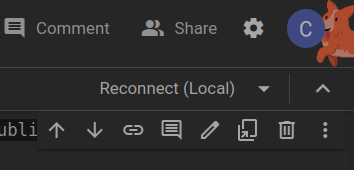

Select the down arrow and this following will pop up.  You need to paste the link you copied into the below where is specifies 'Please enter a valid backend URL'.  Click 'Connect'.

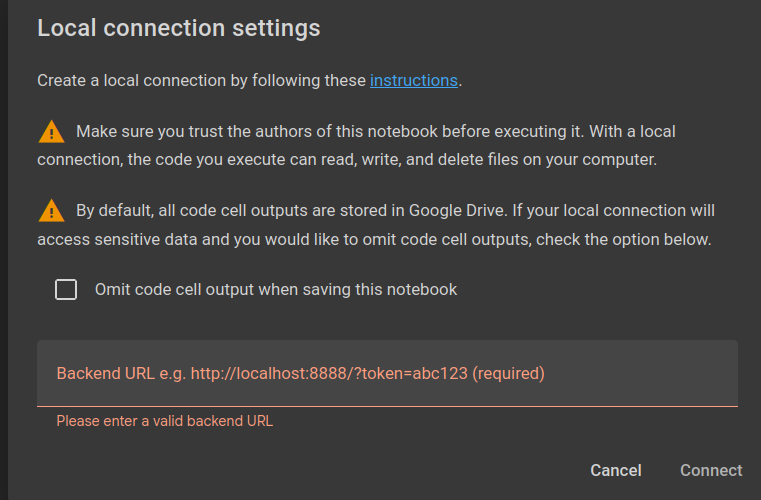

It will now run as your local GPU.

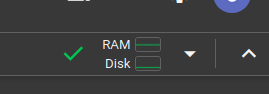

Check by selecting resources (or running the below commands).

You will need to follow the below steps to ensure it is set to GPU.  If you find it isn't; you will need to go to the Runtime type and select GPU to switch on the notebook to GPU. (This will restart a few times for the above steps).  You will need to check that GPU is enabled by running the scripts below.

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import keras

In [ ]:
# Check that everything is set up correctly, and version of installed items
print("===============================")
print("-------------------------------")
print("Version of Tensorflow: ", tf.__version__)
print("Version of Tensorflow: ", keras. __version__)
print("Version of Numpy: ", np.__version__)
print("Version of Pandas: ", pd.__version__)
print("-------------------------------")
print("===============================")

-------------------------------
Version of Tensorflow:  2.15.0
Version of Tensorflow:  2.15.0
Version of Numpy:  1.25.2
Version of Pandas:  2.0.3
-------------------------------


#This will tell if you are using a GPU.  If you are not, it will error / have no GPU there.  

If you have no GPU, you can still run your notebook - it will just be slow. :|

Steps: Either connect to Colab and use thiers or go back to the initial steps and debug.  
Of note - you do need to select GPU in notebook settings.
Colab defaults to what you used last - so if you had previously run out of Colab GPU and switched to CPU, it will default to that when you set up local

#Example error below

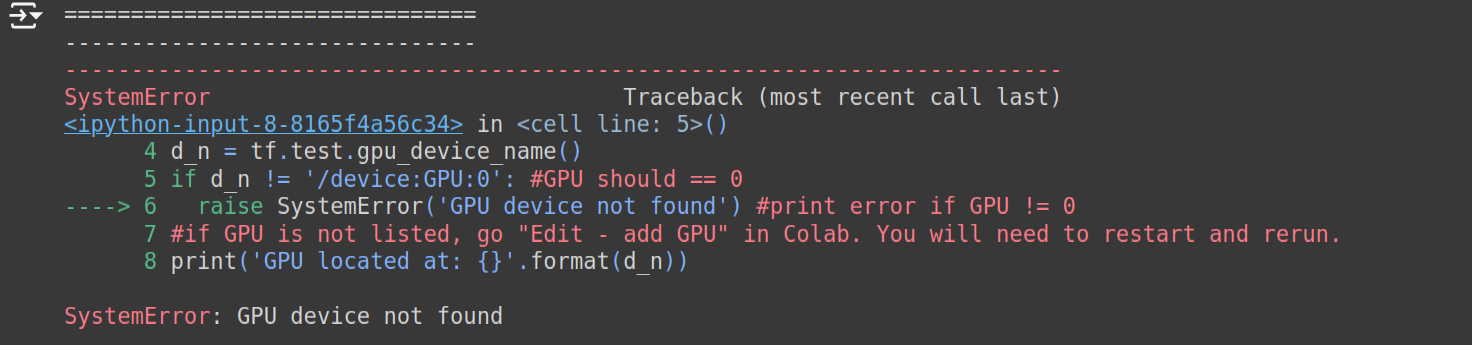

In [ ]:
# Check if there is a GPU
print("===============================")
print("-------------------------------")
d_n = tf.test.gpu_device_name()
if d_n != '/device:GPU:0':  # GPU should == 0
  raise SystemError('GPU device not found')  # Print error if GPU != 0
# If GPU is not listed, go "Edit - add GPU" in Colab. You will need to restart and rerun.
print('GPU located at: {}'.format(d_n))
print("GPU located at : ", tf.test.gpu_device_name())
print("# of GPUs : ", len(tf.config.experimental.list_physical_devices('GPU')))
print("-------------------------------")
print("===============================")

-------------------------------
GPU located at: /device:GPU:0
GPU located at :  /device:GPU:0
# of GPUs :  1
-------------------------------


If this displays correctly with 1 GPU - you have successfully completed these steps!